# Homework Assignment
- Joseph (Alex) McGraw - jam27652
- Matthew Ruffner - mar9632
- Matthew Streichler - mrs4732

#### Q3 - Understand the key elements of Fast.ai

* ImageDataBunch
    * A class in the fastai.vision library that handles everything related to input images
    * Includes many functions for the many different wats data can be represented to the network
* create_cnn
    * all functions necessary for the model to “learn” the training data

#### Q4 - What is a residual network, resnet34 v. resent50

* Residual Network (ResNet)
    * An architectural variation of a neural network, however, weights have the capability to "skip" layers
    * Motivation behind skipping layers is to avoid the vanishing gradient problem -- done by using weights and activations from preivous layers

|          | resnet34 | resnet50 |
| :------: | :------: | :------: |
| #Layers  |   34     |   50     |
| #Neurons |  7,615   |  22,720  |
| #Weights |21,800,000|25,600,000|
| Other    | less time to train, less prone to overfitting | longer time to train, more prone to overfitting |

*Note: #Weights estimates found at: http://sites.skoltech.ru/app/data/uploads/sites/25/2017/12/slides.pdf*

*Note: #Neurons calculated from following image:*

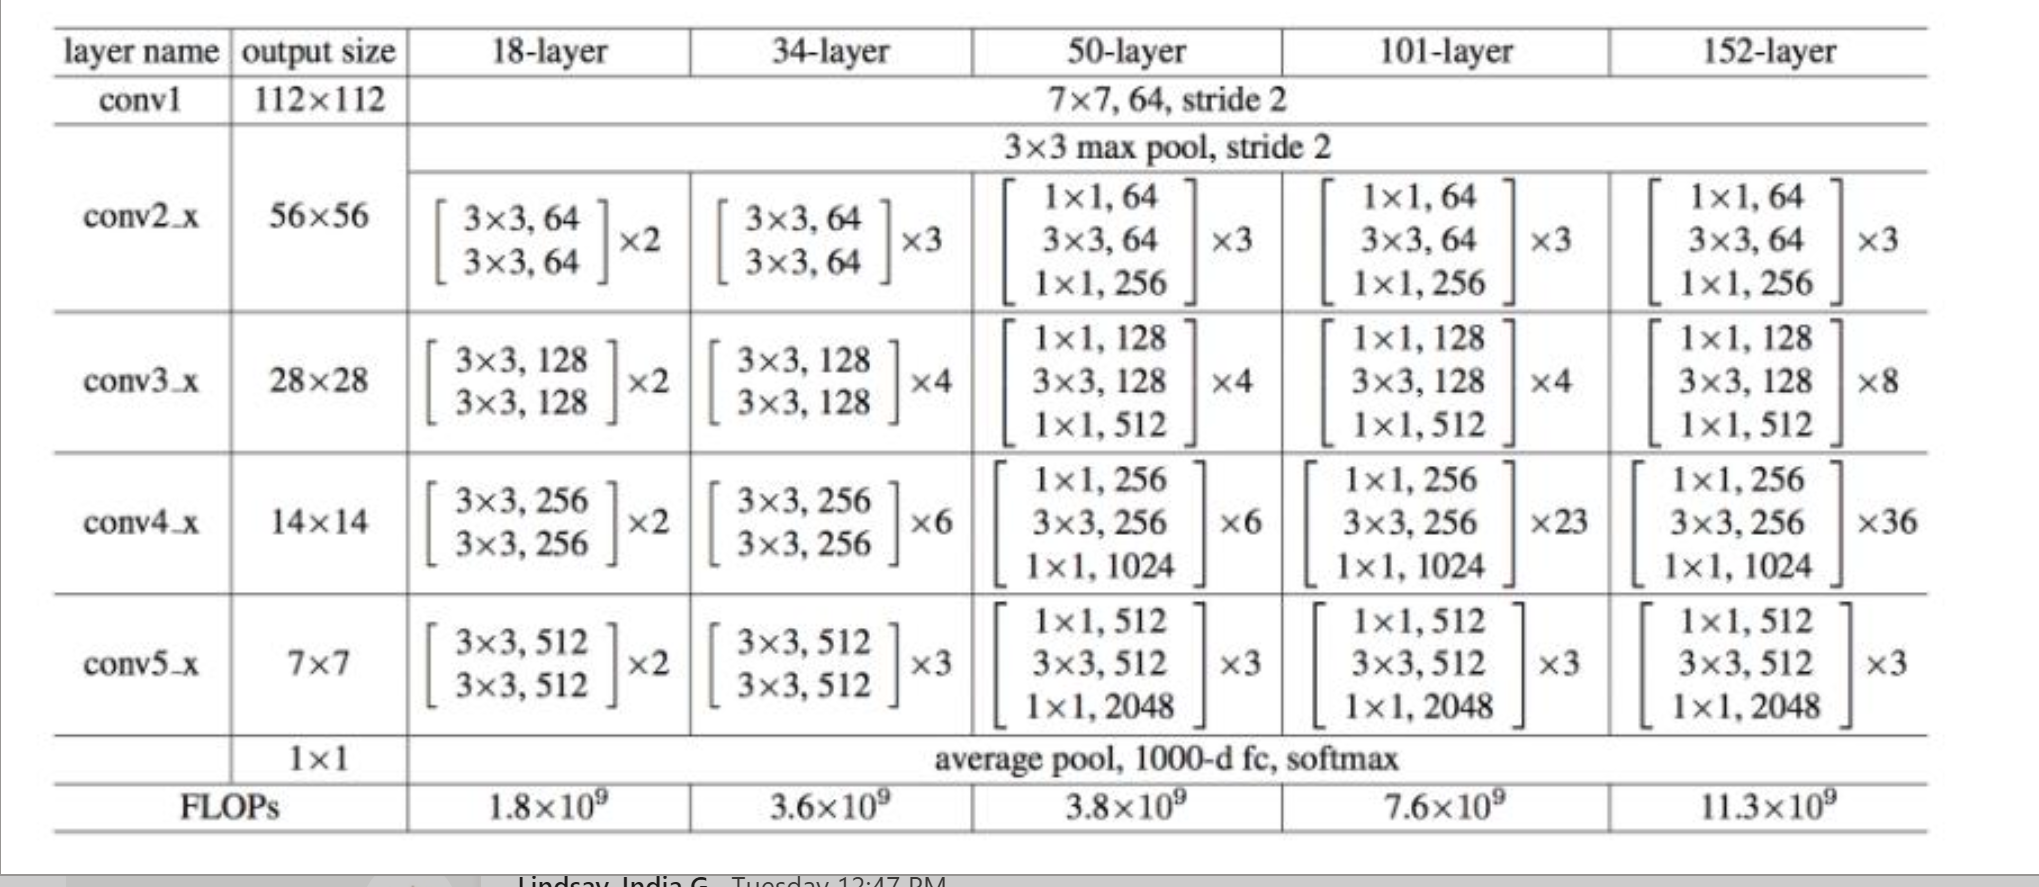

In [27]:
from PIL import Image
image = Image.open("/resnet.png"); image

#### Q5 - How is pre-trained resnet34 modified to get the network the notebook trains

Each layer learns a specific shape or pattern. The model is then trained to locate these shapes and patterns. When the model moves to the next layer, the model is able to produce a deeper and clearer understanding of the data. Transfer learning is used in this as the model is pre-trained from previous layers and the future layers are able to pick up on the shapes and patterns for future data. This, in turn, uses less data and produces more accurate results.

# Imports for questions 6 and 7:

In [1]:
import fastai
fastai.__version__
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 727kB 8.2MB/s 
     |████████████████████████████████| 194kB 16.9MB/s 
     |████████████████████████████████| 1.2MB 20.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 12.8MB 237kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [3]:
from fastai.vision import *
import pandas as pd
import numpy as np
from google.colab import files, drive
import io
import os

%matplotlib inline
import torch
import glob
import pathlib
import matplotlib.pyplot as plt
from fastai.imports import *

In [4]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Question 6:
Download a NOT pre-trained resnet34, and then by playing with the number of epochs and learning rates (possibly different learning rates across layers), see how low you can get the error.  Can you get below 20%?

In [6]:
# Defining function to isolate data from URL
def get_data(url, presize, resize):
    path = untar_data(url)
    return DataBlock(
        blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
        splitter=GrandparentSplitter(valid_name='val'),
        get_y=parent_label, item_tfms=Resize(presize),
        batch_tfms=[*aug_transforms(min_scale=0.5, size=resize),
                    Normalize.from_stats(*imagenet_stats)],
    ).dataloaders(path, bs=128)

In [7]:
# Grabbing URLs from Imagenet
dls = get_data(URLs.IMAGENETTE_160, 160, 128)

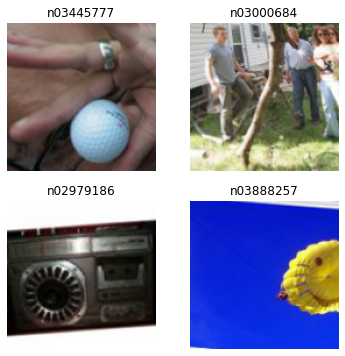

In [8]:
dls.show_batch(max_n=4)


In [9]:
def avg_pool(x): return x.mean((2,3))
def block(ni, nf): return ConvLayer(ni, nf, stride=2)
def get_model():
    return nn.Sequential(
        block(3, 16),
        block(16, 32),
        block(32, 64),
        block(64, 128),
        block(128, 256),
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(256, dls.c))

In [10]:
# Non pretrained resnet 34 model 
resnet = models.resnet34(pretrained=False)
def get_learner(m):
    return Learner(dls, m, loss_func=nn.CrossEntropyLoss(), metrics=accuracy
                  ).to_fp16()

learn = get_learner(resnet)

SuggestedLRs(lr_min=0.2290867567062378, lr_steep=1.9054607152938843)

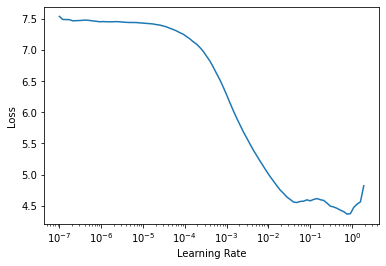

In [ ]:
# searching over learning rate space
learn.lr_find()

In [ ]:
#lr_min=0.06309573650360108, lr_steep=0.0006918309954926372
#SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.0010000000474974513)
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.665154,1.372864,0.601783,00:26
1,0.937820,1.447365,0.573503,00:26
2,1.002672,1.573510,0.553376,00:27
3,0.916851,1.239312,0.612739,00:26
4,0.843090,1.246686,0.623185,00:26
5,0.756397,0.813042,0.739873,00:26
6,0.673455,0.769479,0.760255,00:26
7,0.592346,0.685914,0.793376,00:27
8,0.508687,0.555009,0.823949,00:26
9,0.447750,0.542372,0.828790,00:26


In [ ]:
# saving model
learn.save('stage-1')

Path('models/stage-1.pth')

## Question 7:
And for the main part of this HW: download (and label) your own data set of your choice, create a classification problem, and then use the main tools/ideas of this notebook to build a classifier.  It does not need to be a multi-label classifier.

In [ ]:
### LOAD THE ASSOCIATED MODEL FILE ###
#learn.load(export.pkl)

In [5]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In JavaScript console:
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [6]:
# calling CSVs of siamese cats and husky dogs from google images
folder = 'Siamese Cats'
file = 'siamese_urls.csv'

In [8]:
folder = 'Husky Dogs'
file = 'husky_urls.csv'

In [9]:
# run twice, one for each set of urls
path = Path('data/CatsDogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/CatsDogs/Husky Dogs'),
 PosixPath('data/CatsDogs/Siamese Cats')]

In [11]:
classes = ['Siamese Cats','Husky Dogs']

In [ ]:
# downloading siamese cat pictures off of google images 
download_images('/siamese_urls.csv','data/CatsDogs/Siamese Cats',max_pics=200)

In [13]:
# downloading husky dog pictures off of google images
download_images('/husky_urls.csv','data/CatsDogs/Husky Dogs',max_pics=200)

In [14]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Siamese Cats


Husky Dogs


In [15]:
# loading data into a ImageDataBunch object and normalizing using imagenet stats
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [18]:
data.classes

['Husky Dogs', 'Siamese Cats']

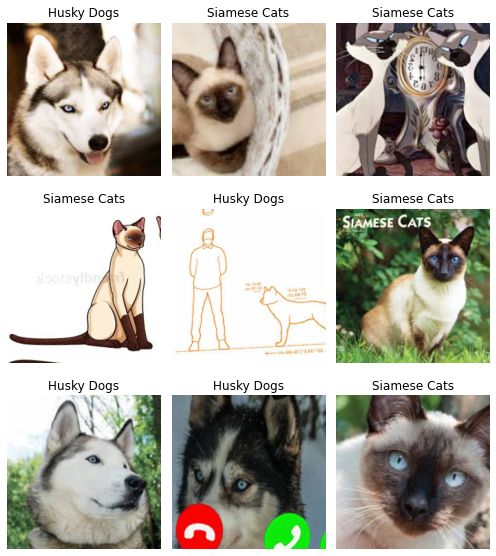

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Husky Dogs', 'Siamese Cats'], 2, 320, 80)

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.761530,0.001264,0.000000,00:04
1,0.402912,0.000182,0.000000,00:04
2,0.260913,0.000139,0.000000,00:04
3,0.197967,0.000253,0.000000,00:04


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [28]:
learn.export() # exporting the model, called 'export.pkl'